In [2]:
#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('creditcard.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(data.shape)

(284807, 31)


In [7]:
data.isnull().values.any()

False

In [8]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]

In [9]:
print(fraud.shape,valid.shape)

(492, 31) (284315, 31)


In [10]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = data[['Time','Amount']]
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 2)
(284807,)


In [11]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 40)

In [13]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [14]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc)) 

The accuracy of Render forest is 0.9980162213405428


In [15]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(xTrain, yTrain)
yPred=gnb.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Naive Bayes is {}".format(acc))

The accuracy of Naive Bayes is 0.9982971103542713


In [17]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(xTrain, yTrain)
yPred=dummy.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Dummy Classifier is {}".format(acc)) 

The accuracy of Dummy Classifier is 0.9982971103542713


In [18]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xTrain, yTrain)
yPred=svm.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of SVM is {}".format(acc)) 

The accuracy of SVM is 0.9982971103542713


In [19]:
print(fraud.shape)

(492, 31)


In [20]:
# Lets shuffle the data before creating the subsamples

data1 = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])

# Shuffle dataframe rows
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83564,59918.0,-0.826807,-0.012386,1.269931,-1.773298,0.557487,-0.991529,0.444823,-0.142345,-1.700824,...,-0.770416,-2.051441,-0.013905,-0.507651,0.121948,0.602588,-0.077763,0.050695,14.98,0
191544,129308.0,0.054682,1.856500,-4.075451,4.100098,-0.800931,-0.292502,-2.317431,1.189747,-0.786238,...,0.618248,0.800932,0.130016,0.288946,-0.366658,0.030307,0.431182,0.110698,80.90,1
202030,134140.0,2.237125,-1.610423,-0.195687,-1.755575,-1.757984,-0.153951,-1.816768,0.121319,-1.017022,...,-0.085274,0.131492,0.305395,-0.552807,-0.592536,-0.270208,0.045825,-0.044880,16.62,0
12261,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1
44270,41870.0,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


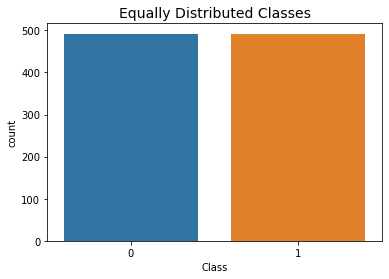

In [21]:
print('Distribution of the Classes in the subsample dataset')
print(new_data1['Class'].value_counts()/len(new_data1))


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Class', data=new_data1)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [22]:
# dividing the X and the Y from the dataset 
#X = data.drop(['Class'], axis = 1)
X = new_data1[['Time','Amount']]
Y = new_data1["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(984, 2)
(984,)


In [23]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 40)

In [24]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

In [25]:
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Render forest is {}".format(acc)) 

The accuracy of Render forest is 0.6954314720812182
